In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data = data.sort_values('Date')

data = data.drop('Date', axis=1)

# Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)





data1 = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data1 = data1.sort_values('Date')





In [34]:
to5=[]
just6=[]
for i in data:
    to5.append(i[0:5])
    just6.append(i[5])
print(just6)

X_train, X_test, Y_train, Y_test = train_test_split(to5, just6, test_size=0.1, random_state=32)





X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data1[['Open', 'High', 'Low', 'Close', 'Adj Close']], data1['Volume'], test_size=0.1, random_state=32)




[0.2194438715886437, 0.200152952498797, 0.23866175156389635, 0.14285591530899844, 0.1446174468962673, 0.1747697119681034, 0.1584175431360418, 0.1108089296762219, 0.24734910978208566, 0.3393483192410806, 0.17465800508695953, 0.19092424554891044, 0.27873444696500993, 0.3276491716505121, 0.5107195641713068, 0.29221231181686946, 0.19217020691551523, 0.14038117824981097, 0.15075702894067505, 0.149541142503609, 0.14099126967759676, 0.3236406131848491, 0.26262287756925823, 0.16144651818244313, 0.17938836186155221, 0.24529971815494606, 0.2608527531449783, 0.1871433972640407, 0.16043685983364267, 0.10328160445452671, 0.14973877775486355, 0.23574877981714443, 0.25322231387915034, 0.2387219014229738, 0.3029146903141541, 0.17729170963085172, 0.19891558396920328, 0.19014659379940882, 0.17489001168625834, 0.19562023097545886, 0.18780074929538737, 0.2397100776792466, 0.3494191242180518, 0.2481310579500928, 0.17718859558671893, 0.2514994500584313, 0.1375756169656974, 0.17335189386127725, 0.14160565752

In [35]:

X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)



X_train1=X_train1.to_numpy()
X_test1=X_test1.to_numpy()
Y_train1=Y_train1.to_numpy()
Y_test1=Y_test1.to_numpy()


In [36]:
#Reshape the input data to be 3D

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))







In [70]:

model = keras.models.Sequential([
    keras.layers.LSTM(units=70, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(units=70, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(units=70),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=6)
])






In [72]:

#Compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
#Train
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 6s 12ms/step - loss: 0.0068
Epoch 2/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 3/100
39/39 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 4/100
39/39 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 5/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 6/100
39/39 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 7/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 8/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 9/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 10/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 11/100
39/39 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 12/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0038
Epoch 13/100
39/39 [=====

In [74]:

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, -1]

#X_train


5/5 [==============================] - 2s 4ms/step


In [75]:
print(predictions.shape)
print(Y_test1.shape)

(139,)
(139,)


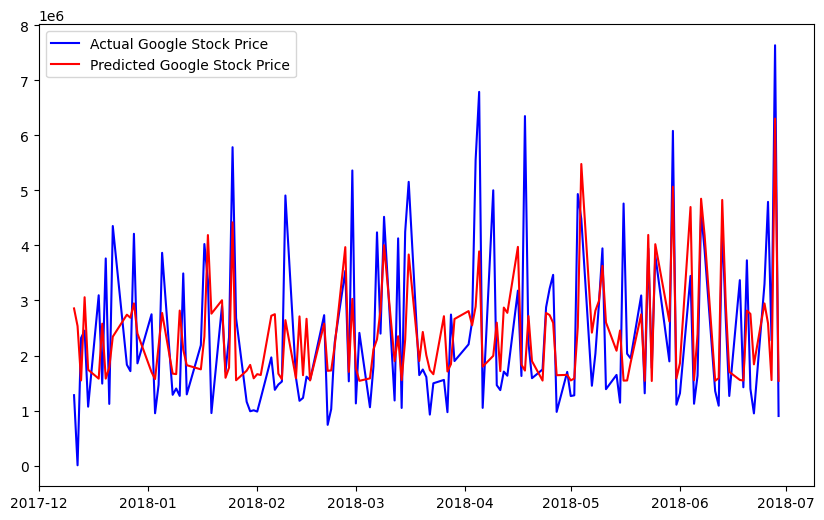

In [78]:
plt.figure(figsize=(10,6))
plt.plot(data1['Date'][len(data1)-len(Y_test1):], Y_test1, color='blue', label='Actual Google Stock Price')
plt.plot(data1['Date'][len(data1)-len(predictions):], predictions, color='red', label='Predicted Google Stock Price')
plt.legend()
plt.show()